In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

#### 1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [2]:
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### 2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [3]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df["variaty"] = iris_data.target
iris_df.rename(columns={"sepal length (cm)": "sepal_length", "sepal width (cm)": "sepal_width"}, inplace=True)
iris_df = iris_df[["sepal_length", "sepal_width", "variaty"]]

iris_df

,sepal_length,sepal_width,variaty
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


#### 3. Разделите данные на выборку для обучения и тестирования

In [4]:
df_train, df_test = train_test_split(iris_df, test_size=0.2)
y_train, y_test = df_train['variaty'], df_test['variaty']
del df_train['variaty']
del df_test['variaty']

In [5]:
df_test.head()

,sepal_length,sepal_width
50,7.0,3.2
46,5.1,3.8
116,6.5,3.0
28,5.2,3.4
120,6.9,3.2


In [6]:
df_train.head()

,sepal_length,sepal_width
55,5.7,2.8
143,6.8,3.2
148,6.2,3.4
108,6.7,2.5
71,6.1,2.8


In [7]:
y_test.head()

50     1
46     0
116    2
28     0
120    2
Name: variaty, dtype: int64

In [8]:
y_train.head()

55     1
143    2
148    2
108    2
71     1
Name: variaty, dtype: int64

#### 4. Постройте модель LDA

In [9]:
lda = LinearDiscriminantAnalysis()
lda.fit(df_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
lda.predict(df_test)

array([2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2,
       0, 1, 1, 1, 0, 0, 0, 0])

In [11]:
result_lda = pd.DataFrame([y_test.values, lda.predict(df_test)]).T
result_lda

,0,1
0,1,2
1,0,0
2,2,2
3,0,0
4,2,2
5,1,1
6,0,0
7,1,2
8,2,1
9,1,1


In [12]:
accuracy_score(y_test, lda.predict(df_test))

0.8333333333333334

Модель может предсказать класс ириса с точностью 83%

In [13]:
lda.coef_

array([[-5.78718271,  7.52189262],
       [ 1.22217973, -3.14548922],
       [ 3.51947278, -3.28825096]])

Видим, что первый класс весомо выделяется. Второй и третий классы имеют очень схожий показатель sepal_width

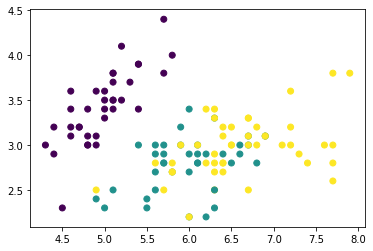

In [14]:
plt.scatter(df_train.sepal_length, df_train.sepal_width, c=y_train)
plt.show()

На графике это видно так же отчетливо

In [15]:
lr = LogisticRegression()
lr.fit(df_train, y_train)

LogisticRegression()

In [16]:
lr.predict(df_test)

array([2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2,
       0, 1, 1, 1, 0, 0, 0, 0])

In [17]:
result_lr = pd.DataFrame([y_test.values, lr.predict(df_test)]).T
result_lr

,0,1
0,1,2
1,0,0
2,2,2
3,0,0
4,2,2
5,1,1
6,0,0
7,1,2
8,2,1
9,1,1


In [18]:
accuracy_score(y_test, lr.predict(df_test))

0.8333333333333334

Примение модели логистической регрессии показывает те же результаты

#### 5. Визуализируйте предсказания для тестовой выборки и центры классов

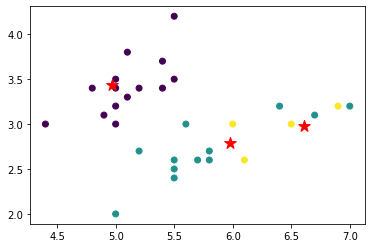

In [19]:
plt.scatter(df_test.sepal_length, df_test.sepal_width, c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

#### 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [20]:
small_df = iris_df[["sepal_length", "sepal_width"]]
small_df

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


#### 7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

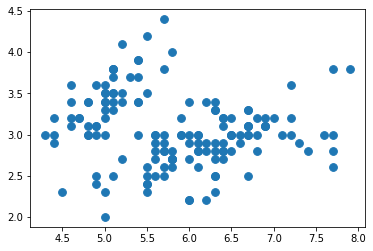

In [21]:
# нормализуем данные
scaler = StandardScaler()
small_df_scaled = scaler.fit_transform(small_df)
plt.scatter(small_df.sepal_length, small_df.sepal_width, cmap='autumn', s=60)
plt.show()

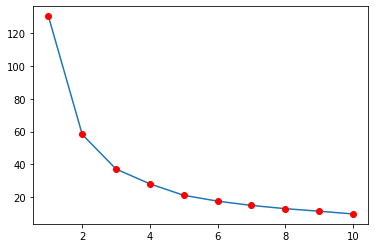

In [22]:
# подбираем оптимальное количество кластеров
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(small_df)
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.show()

На графике видим, что оптимальное число кластеров может быть равно четырем, там где сгиб "локтя" заканчивается - примем количество за четыре

In [23]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(small_df)
clusters

array([3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3,
       3, 1, 3, 1, 3, 3, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

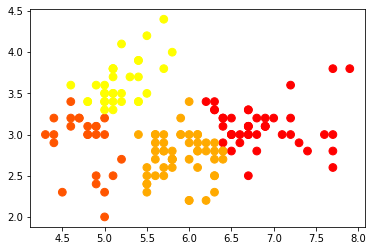

In [24]:
plt.scatter(small_df.sepal_length, small_df.sepal_width, cmap='autumn', c=clusters, s=60)
plt.show()